# Import libs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix,solvers
import cvxpy as cp

# Create MDP

In [2]:
# set environment and actions
S = np.arange(100).reshape((10, 10)).T
A = ["top", "bottom", "left", "right"]

In [3]:
def transition_probabilities(w):
    # creates a dictionary with key (action, state_x, state_y), which returns matrix with probabilities
    # init probabilities
    probs = {}
    for x in range(10):
        for y in range(10):
            probs[('top', x, y)], probs[('bottom', x, y)], probs[('right', x, y)], probs[('left', x, y)] = \
                np.zeros((10, 10)), np.zeros((10, 10)), np.zeros((10, 10)), np.zeros((10, 10))
            # prcoess top-left angle
            if x == 0 and y == 0:
                # action == top
                probs[('top', x, y)][y, x], probs[('top', x, y)][y, x+1], probs[('top', x, y)][y+1, x] = \
                   1 - w * 2/4, w * 1/4, w * 1/4
                # action == bottom
                probs[('bottom', x, y)][y, x], probs[('bottom', x, y)][y, x+1], probs[('bottom', x, y)][y+1, x] = \
                   w * 2/4, w * 1/4, 1 - w * 3/4
                # action == left
                probs[('left', x, y)][y, x], probs[('left', x, y)][y, x+1], probs[('left', x, y)][y+1, x] = \
                   1 - w * 2/4, w * 1/4, w * 1/4
                # action == right
                probs[('right', x, y)][y, x], probs[('right', x, y)][y, x+1], probs[('right', x, y)][y+1, x] = \
                   w * 2/4, 1 - w * 3/4, w * 1/4
            # process top-right angle
            elif x == 9 and y == 0:
                # action == top
                probs[('top', x, y)][y, x], probs[('top', x, y)][y, x-1], probs[('top', x, y)][y+1, x] = \
                   1 - w * 2/4, w * 1/4, w * 1/4
                # action == bottom
                probs[('bottom', x, y)][y, x], probs[('bottom', x, y)][y, x-1], probs[('bottom', x, y)][y+1, x] = \
                   w * 2/4, w * 1/4, 1 - w * 3/4
                # action == left
                probs[('left', x, y)][y, x], probs[('left', x, y)][y, x-1], probs[('left', x, y)][y+1, x] = \
                   w * 2/4, 1 - w * 3/4, w * 1/4
                # action == right
                probs[('right', x, y)][y, x], probs[('right', x, y)][y, x-1], probs[('right', x, y)][y+1, x] = \
                   1 - w * 2/4, w * 1/4, w * 1/4
            # process bottom-right angle
            elif x == 9 and y == 9:
                # action == top
                probs[('top', x, y)][y, x], probs[('top', x, y)][y, x-1], probs[('top', x, y)][y-1, x] = \
                   w * 2/4, w * 1/4, 1 - w * 3/4
                # action == bottom
                probs[('bottom', x, y)][y, x], probs[('bottom', x, y)][y, x-1], probs[('bottom', x, y)][y-1, x] = \
                   1 - w * 2/4, w * 1/4, w * 1/4
                # action == left
                probs[('left', x, y)][y, x], probs[('left', x, y)][y, x-1], probs[('left', x, y)][y-1, x] = \
                   w * 2/4, 1 - w * 3/4, w * 1/4
                # action == right
                probs[('right', x, y)][y, x], probs[('right', x, y)][y, x-1], probs[('right', x, y)][y-1, x] = \
                   1 - w * 2/4, w * 1/4, w * 1/4
            # process bottom-left angle
            elif x == 0 and y == 9:
                # action == top
                probs[('top', x, y)][y, x], probs[('top', x, y)][y, x+1], probs[('top', x, y)][y-1, x] = \
                   w * 2/4, w * 1/4, 1 - w * 3/4
                # action == bottom
                probs[('bottom', x, y)][y, x], probs[('bottom', x, y)][y, x+1], probs[('bottom', x, y)][y-1, x] = \
                   1 - w * 2/4, w * 1/4, w * 1/4
                # action == left
                probs[('left', x, y)][y, x], probs[('left', x, y)][y, x+1], probs[('left', x, y)][y-1, x] = \
                    1 - w * 2/4, w * 1/4, w * 1/4
                # action == right
                probs[('right', x, y)][y, x], probs[('right', x, y)][y, x+1], probs[('right', x, y)][y-1, x] = \
                   w * 2/4, 1 - w * 3/4, w * 1/4
            # process top row
            elif y == 0:
                # action == top
                probs[('top', x, y)][y, x-1], probs[('top', x, y)][y, x], probs[('top', x, y)][y, x+1], \
                    probs[('top', x, y)][y+1, x] = w * 1/4, 1 - w * 3/4, w * 1/4, w * 1/4
                # action == bottom
                probs[('bottom', x, y)][y, x-1], probs[('bottom', x, y)][y, x], probs[('bottom', x, y)][y, x+1], \
                    probs[('bottom', x, y)][y+1, x] = w * 1/4, w * 1/4, w * 1/4, 1 - w * 3/4
                # action == left
                probs[('left', x, y)][y, x-1], probs[('left', x, y)][y, x], probs[('left', x, y)][y, x+1], \
                    probs[('left', x, y)][y+1, x] = 1 - w * 3/4, w * 1/4, w * 1/4, w * 1/4
                # action == right
                probs[('right', x, y)][y, x-1], probs[('right', x, y)][y, x], probs[('right', x, y)][y, x+1], \
                    probs[('right', x, y)][y+1, x] = w * 1/4, w * 1/4, 1 - w * 3/4, w * 1/4
            # process bottom row
            elif y == 9:
                # action == top
                probs[('top', x, y)][y, x-1], probs[('top', x, y)][y, x], probs[('top', x, y)][y, x+1], \
                    probs[('top', x, y)][y-1, x] = w * 1/4, w * 1/4, w * 1/4, 1 - w * 3/4
                # action == bottom
                probs[('bottom', x, y)][y, x-1], probs[('bottom', x, y)][y, x], probs[('bottom', x, y)][y, x+1], \
                    probs[('bottom', x, y)][y-1, x] = w * 1/4, 1 - w * 3/4, w * 1/4, w * 1/4
                # action == left
                probs[('left', x, y)][y, x-1], probs[('left', x, y)][y, x], probs[('left', x, y)][y, x+1], \
                    probs[('left', x, y)][y-1, x] = 1 - w * 3/4, w * 1/4, w * 1/4, w * 1/4
                # action == right
                probs[('right', x, y)][y, x-1], probs[('right', x, y)][y, x], probs[('right', x, y)][y, x+1], \
                    probs[('right', x, y)][y-1, x] = w * 1/4, w * 1/4, 1 - w * 3/4, w * 1/4
            # process left row
            elif x == 0:
                # action == top
                probs[('top', x, y)][y-1, x], probs[('top', x, y)][y, x], probs[('top', x, y)][y+1, x], \
                    probs[('top', x, y)][y, x+1] = 1 - w * 3/4, w * 1/4, w * 1/4, w * 1/4
                # action == bottom
                probs[('bottom', x, y)][y-1, x], probs[('bottom', x, y)][y, x], probs[('bottom', x, y)][y+1, x], \
                    probs[('bottom', x, y)][y, x+1] = w * 1/4, w * 1/4, 1 - w * 3/4, w * 1/4
                # action == left
                probs[('left', x, y)][y-1, x], probs[('left', x, y)][y, x], probs[('left', x, y)][y+1, x], \
                    probs[('left', x, y)][y, x+1] = w * 1/4, 1 - w * 3/4, w * 1/4, w * 1/4
                # action == right
                probs[('right', x, y)][y-1, x], probs[('right', x, y)][y, x], probs[('right', x, y)][y+1, x], \
                    probs[('right', x, y)][y, x+1] = w * 1/4, w * 1/4, w * 1/4, 1 - w * 3/4
            # process right row
            elif x == 9:
                # action == top
                probs[('top', x, y)][y-1, x], probs[('top', x, y)][y, x], probs[('top', x, y)][y+1, x], \
                    probs[('top', x, y)][y, x-1] = 1 - w * 3/4, w * 1/4, w * 1/4, w * 1/4
                # action == bottom
                probs[('bottom', x, y)][y-1, x], probs[('bottom', x, y)][y, x], probs[('bottom', x, y)][y+1, x], \
                    probs[('bottom', x, y)][y, x-1] = w * 1/4, w * 1/4, 1 - w * 3/4, w * 1/4
                # action == left
                probs[('left', x, y)][y-1, x], probs[('left', x, y)][y, x], probs[('left', x, y)][y+1, x], \
                    probs[('left', x, y)][y, x-1] = w * 1/4, w * 1/4, w * 1/4, 1 - w * 3/4
                # action == right
                probs[('right', x, y)][y-1, x], probs[('right', x, y)][y, x], probs[('right', x, y)][y+1, x], \
                    probs[('right', x, y)][y, x-1] = w * 1/4, 1 - w * 3/4, w * 1/4, w * 1/4
            else:                
                # action == top
                probs[('top', x, y)][y-1, x], probs[('top', x, y)][y+1, x], \
                probs[('top', x, y)][y, x-1], probs[('top', x, y)][y, x+1] = 1 - w * 3/4, w * 1/4, w * 1/4, w * 1/4
                # action == bottom
                probs[('bottom', x, y)][y-1, x], probs[('bottom', x, y)][y+1, x], \
                probs[('bottom', x, y)][y, x-1], probs[('bottom', x, y)][y, x+1] = w * 1/4, 1 - w * 3/4, w * 1/4, w * 1/4 
                # action == left
                probs[('left', x, y)][y-1, x], probs[('left', x, y)][y+1, x], \
                probs[('left', x, y)][y, x-1], probs[('left', x, y)][y, x+1] = w * 1/4, w * 1/4, 1 - w * 3/4, w * 1/4
                # action == right
                probs[('right', x, y)][y-1, x], probs[('right', x, y)][y+1, x], \
                probs[('right', x, y)][y, x-1], probs[('right', x, y)][y, x+1] = w * 1/4, w * 1/4, w * 1/4, 1 - w * 3/4 
            
    return probs

In [4]:
# set wind probability
w = 0.1
# set transition probabiities
P = transition_probabilities(w)

# Run tests and visually inspect border cases

In [5]:
def run_tests(A, transition_probs):
    # this function checks if transition probabilities sum to 1
    check = True
    for action in A:
        for x in range(10):
            for y in range(10):
                if np.sum(transition_probs[(action, x, y)]) != 1:
                    print("error in matrix (", action, x, y, ")")
                    check = False
    if check: 
        print("it's all good!")
        
def test_border_case(x, y, transition_probs):
    # allows to visually inspect border cases
    print("top")
    print(transition_probs[("top", x, y)])
    print("bottom")
    print(transition_probs[("bottom", x, y)])
    print("left")
    print(transition_probs[("left", x, y)])
    print("right")
    print(transition_probs[("right", x, y)])

In [6]:
# run tests to see if transition probabilities pass sanity check
run_tests(A, P)

it's all good!


In [7]:
# before proceeding, check all cases:
test_border_case(0, 8, P)

top
[[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.925 0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.025 0.025 0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.025 0.    0.    0.    0.    0.    0.    0.    0.    0.   ]]
bottom
[[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.   

# Reward functions

In [8]:
def create_reward(scores):
    # creates reward matrix from an array of type (state_x, state_y, reward)
    rewards = np.zeros((10, 10))
    for (x, y, reward) in scores:
        rewards[y, x] = reward
        
    return rewards

In [98]:
R1 = create_reward([(1, 4, -1), (1, 5, -1), (2, 4, -1), (2, 5, -1), 
                    (2, 8, -1), (2, 9, -1), (3, 8, -1), (3, 9, -1),
                    (5, 2, -1), (5, 3, -1), (6, 2, -1), (6, 3, -1),
                    (9, 9, 1)])

R2 = create_reward([(4, 1, -100), (4, 2, -100), (4, 3, -100), (4, 4, -100), (4, 5, -100), (4, 6, -100),
                    (5, 1, -100),
                    (6, 1, -100), (6, 2, -100), (6, 3, -100), (6, 7, -100), (6, 8, -100),
                    (7, 3, -100), (7, 7, -100),
                    (8, 3, -100), (8, 4, -100), (8, 5, -100), (8, 6, -100), (8, 7, -100),
                    (9, 9, 10)])

# Create environments

In [10]:
class EnvironmentRL:
    # an MDP is defined by S, A, P, R, gamma
    def __init__(self, S, A, P, R, gamma):
        self.S = S
        self.A = A
        self.P = P
        self.R = R
        self.gamma = gamma

In [11]:
# set up discount factor
gamma = 0.8
# Create environments
env1 = EnvironmentRL(S, A, P, R1, gamma)
# Create environments
env2 = EnvironmentRL(S, A, P, R2, gamma)

# Question 1

For visualization purpose, generate heat maps of Reward function 1 and
Reward function 2. For the heat maps, make sure you display the coloring scale. You will have 2 plots
for this question

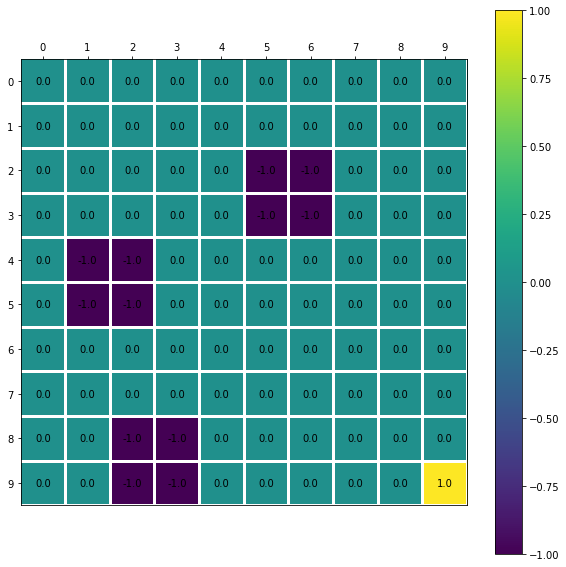

In [73]:
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(R1)

ax.set_xticks(np.arange(10), minor=False)
ax.set_xticks(0.5 + np.arange(10), minor=True)
ax.set_yticks(np.arange(10), minor=False)
ax.set_yticks(0.5 + np.arange(10), minor=True)

# Loop over data dimensions and create text annotations.
for i in range(10):
    for j in range(10):
        text = ax.text(j, i, R1[i, j],
                       ha="center", va="center", color="black")

ax.tick_params(top=True, bottom=False,
               labeltop=True, labelbottom=False)

cbar = ax.figure.colorbar(im, ax=ax)

ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
ax.tick_params(which="minor", bottom=False, left=False)

plt.savefig('plots/q1-r1.png')

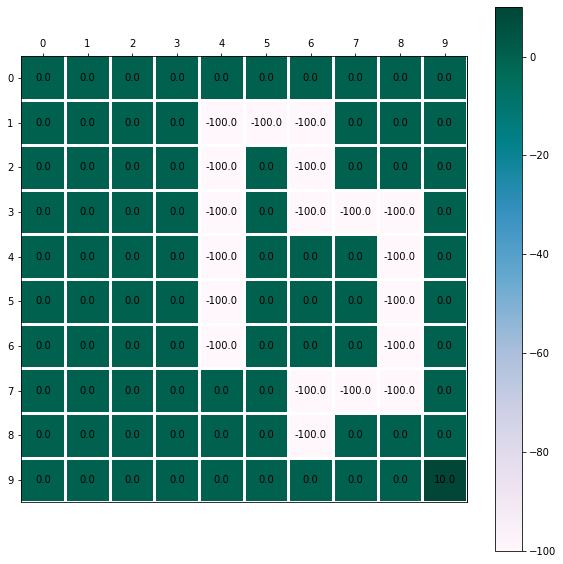

In [74]:
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(R2, cmap = 'PuBuGn')

ax.set_xticks(np.arange(10), minor=False)
ax.set_xticks(0.5 + np.arange(10), minor=True)
ax.set_yticks(np.arange(10), minor=False)
ax.set_yticks(0.5 + np.arange(10), minor=True)

# # cmaps['Sequential'] = [
#             'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
#             'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
#             'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']
# PuBuGn

# Loop over data dimensions and create text annotations.
for i in range(10):
    for j in range(10):
        text = ax.text(j, i, R2[i, j],
                       ha="center", va="center", color="black")

ax.tick_params(top=True, bottom=False,
               labeltop=True, labelbottom=False)

cbar = ax.figure.colorbar(im, ax=ax)

ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
ax.tick_params(which="minor", bottom=False, left=False)

plt.savefig('plots/q1-r2.png')

# Question 2

Create the environment of the agent using the information provided in section 2. To be specific, create the MDP by setting up the state-space, action set, transition probabilities, discount factor, and reward function. For creating the environment, use the following set of parameters:

    - Number of states = 100 (state space is a 10 by 10 square grid as displayed in figure 1)
    - Number of actions = 4 (set of possible actions is displayed in figure 2)
    - w = 0.1
    - Discount factor = 0.8
    - Reward function 1
    
After you have created the environment, then write an optimal state-value function that takes as input the environment of the agent and outputs the optimal value of each state in the grid. For the optimal state-value function, you have to implement the Initialization (lines 2-4) and Estimation (lines 5-13) steps of the Value Iteration algorithm. For the estimation step, use $\varepsilon = 0.01$. For visualization purpose, you should generate a figure similar to that of figure 1 but with the number of state replaced by the optimal value of that state. In this part of question, you should have 1 plot. Let's assume that your value iteration algorithm converges in N steps. Plot snapshots of state values in 5 different steps linearly distributed from 1 to N. Report N and your step numbers. What observations do you have from the plots?

In [15]:
def value_iteration(environment, epsilon, to_record = [], print_steps = False):
    # initialization
    V = np.zeros((environment.S.shape[0], environment.S.shape[1]))
    # set up delta in a way that will allow to start estimation cycle
    Delta = np.inf
    # record iteration
    current_step = 0
    # init an array of records
    recorded_v = []
    # estimation step
    while Delta > epsilon:
        # print current step
        if print_steps == True:
            print("Step", current_step)
        # reset epsilon
        Delta = 0
        # if we need to record state, do it
        if current_step in to_record:
            recorded_v.append(V.copy())
        # for each state
        for x in range(environment.S.shape[1]):
            for y in range(environment.S.shape[0]):
                # record previous value of V to check how much did it change
                v_small = V[y, x]
                # do a step of value iteration; calculate the expected value of each action
                v_top = np.sum(environment.P[("top", x, y)] * (environment.R + environment.gamma * V))
                v_bottom = np.sum(environment.P[("bottom", x, y)] * (environment.R + environment.gamma * V))
                v_left = np.sum(environment.P[("left", x, y)] * (environment.R + environment.gamma * V))
                v_right = np.sum(environment.P[("right", x, y)] * (environment.R + environment.gamma * V))
                # choose the maximal value
                V[y, x] = max(v_top, v_bottom, v_left, v_right)
                # recalculate value of an update
                Delta = max(Delta, abs(v_small - V[y, x]))
        # record step
        current_step += 1
        
    return V, recorded_v

In [16]:
# set precision
eps = 0.01

# do value iteration for environment 1
V1, rec1 = value_iteration(env1, eps, to_record=[3, 7, 10, 13, 16], print_steps = True)

Step 0
Step 1
Step 2
Step 3
Step 4
Step 5
Step 6
Step 7
Step 8
Step 9
Step 10
Step 11
Step 12
Step 13
Step 14
Step 15
Step 16
Step 17
Step 18
Step 19
Step 20


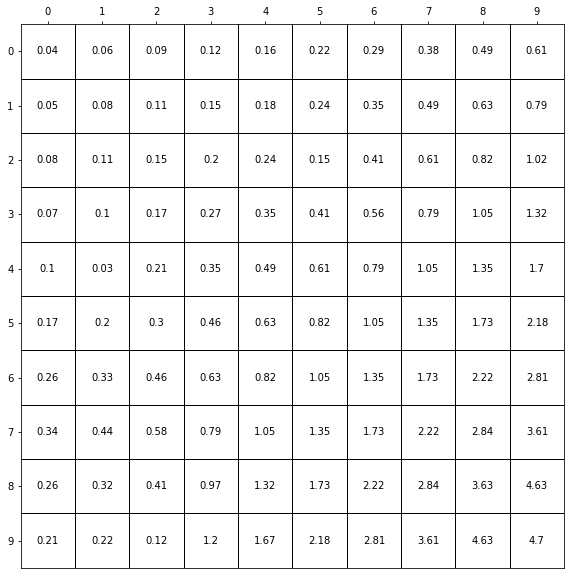

In [75]:
from matplotlib import colors

fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(-100 * np.ones((10, 10)), cmap="Greys", norm=colors.CenteredNorm(0))

ax.set_xticks(np.arange(10), minor=False)
ax.set_xticks(0.5 + np.arange(10), minor=True)
ax.set_yticks(np.arange(10), minor=False)
ax.set_yticks(0.5 + np.arange(10), minor=True)

# Loop over data dimensions and create text annotations.
for i in range(10):
    for j in range(10):
        text = ax.text(j, i, round(V1[i, j], 2),
                       ha="center", va="center", color="black")

ax.tick_params(top=True, bottom=False,
               labeltop=True, labelbottom=False)

ax.grid(which="minor", color="black", linestyle='-', linewidth=1)
ax.tick_params(which="minor", bottom=False, left=False)

plt.savefig('plots/q2-v1.png')

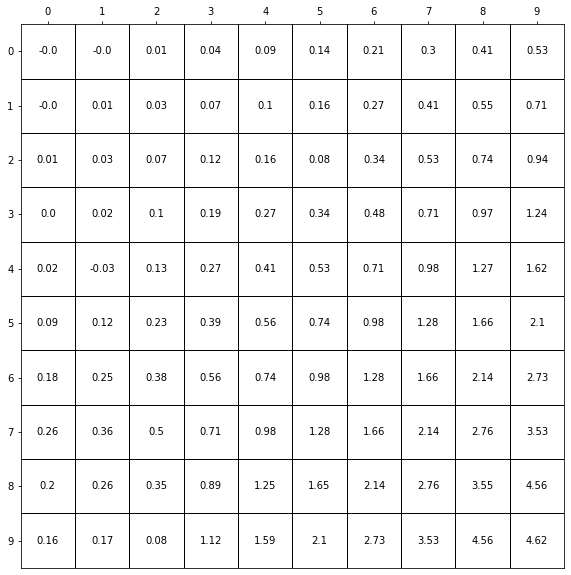

In [83]:
current_plot = 4

fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(-100 * np.ones((10, 10)), cmap="Greys", norm=colors.CenteredNorm(0))

ax.set_xticks(np.arange(10), minor=False)
ax.set_xticks(0.5 + np.arange(10), minor=True)
ax.set_yticks(np.arange(10), minor=False)
ax.set_yticks(0.5 + np.arange(10), minor=True)

# Loop over data dimensions and create text annotations.
for i in range(10):
    for j in range(10):
        text = ax.text(j, i, round(rec1[current_plot][i, j], 2),
                       ha="center", va="center", color="black")

ax.tick_params(top=True, bottom=False,
               labeltop=True, labelbottom=False)

ax.grid(which="minor", color="black", linestyle='-', linewidth=1)
ax.tick_params(which="minor", bottom=False, left=False)

plt.savefig('plots/q2-v1-' + str(current_plot) + '.png')

# Question 3

Generate a heat map of the optimal state values across the 2-D grid. For generating the heat map, you can use the same function provided in the hint earlier (see the hint after question 1).

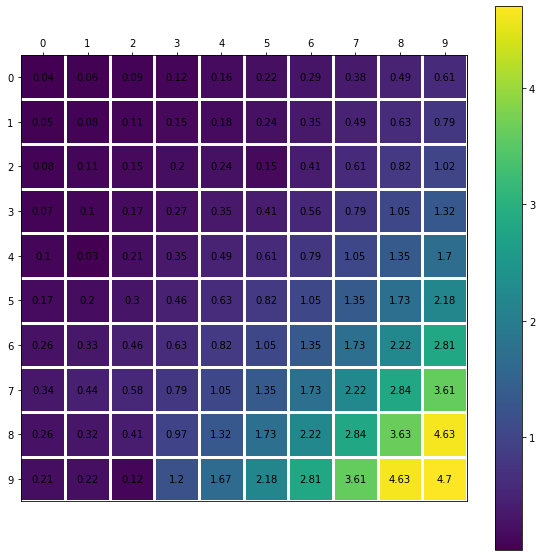

In [77]:
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(V1)

ax.set_xticks(np.arange(10), minor=False)
ax.set_xticks(0.5 + np.arange(10), minor=True)
ax.set_yticks(np.arange(10), minor=False)
ax.set_yticks(0.5 + np.arange(10), minor=True)

# Loop over data dimensions and create text annotations.
for i in range(10):
    for j in range(10):
        text = ax.text(j, i, round(V1[i, j], 2),
                       ha="center", va="center", color="black")

ax.tick_params(top=True, bottom=False,
               labeltop=True, labelbottom=False)

cbar = ax.figure.colorbar(im, ax=ax)

ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
ax.tick_params(which="minor", bottom=False, left=False)

plt.savefig('plots/q3-v1.png')

# Question 4

Question 4: (15 points) Explain the distribution of the optimal state values across the 2-D grid. (Hint: Use the figure generated in question 3 to explain)

Basically, the closer to the bottom left the better. The further the lower because of gamma. Very low (or negative) in the obstacles on the map. Bottom left should be close to 5, as it is 1 / (1 - gamma)

# Question 5

Implement the computation step of the value iteration algorithm (lines 14-17) to compute the optimal policy of the agent navigating the 2-D state-space. For visualization purpose, you should generate a figure similar to that of figure 1 but with the number of state replaced by the optimal action at that state. The optimal actions should be displayed using arrows. Does the optimal policy of the agent match your intuition? Please provide a brief explanation. Is it possible for the agent to compute the optimal action to take at each state by observing the optimal values of it's neighboring states? In this question, you should have 1 plot.

In [31]:
def computation(environment, V):
    # initialization
    pi = np.zeros((environment.S.shape[0], environment.S.shape[1]), dtype=object)
    # for each state
    for x in range(environment.S.shape[1]):
        for y in range(environment.S.shape[0]):
            # do a step of value iteration; calculate the expected value of each action
            v_top = np.sum(environment.P[("top", x, y)] * (environment.R + environment.gamma * V))
            v_bottom = np.sum(environment.P[("bottom", x, y)] * (environment.R + environment.gamma * V))
            v_left = np.sum(environment.P[("left", x, y)] * (environment.R + environment.gamma * V))
            v_right = np.sum(environment.P[("right", x, y)] * (environment.R + environment.gamma * V))
            # init array of values
            action_values = [v_top, v_bottom, v_left, v_right]
            # select the best action
            pi[y, x] = environment.A[np.argmax(action_values)]
    
    return pi

In [32]:
pi1 = computation(env1, V1)

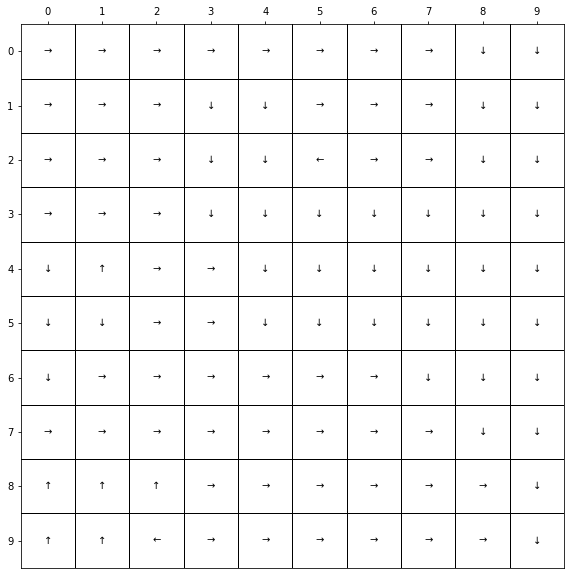

In [78]:
from matplotlib import colors

fig, ax = plt.subplots(figsize=(10,10))
#  + 100 * np.abs(R1)
im = ax.imshow( -100 * np.ones((10, 10)), cmap="Greys", norm=colors.CenteredNorm(0))

ax.set_xticks(np.arange(10), minor=False)
ax.set_xticks(0.5 + np.arange(10), minor=True)
ax.set_yticks(np.arange(10), minor=False)
ax.set_yticks(0.5 + np.arange(10), minor=True)

# Loop over data dimensions and create text annotations.
for i in range(10):
    for j in range(10):
        if pi1[i, j] == "top":
            text = ax.text(j, i, u'\u2191', ha="center", va="center", color="black")
        elif pi1[i, j] == "bottom":
            text = ax.text(j, i, u'\u2193', ha="center", va="center", color="black")
        elif pi1[i, j] == "left":
            text = ax.text(j, i, u'\u2190', ha="center", va="center", color="black")
        elif pi1[i, j] == "right":
            text = ax.text(j, i, u'\u2192', ha="center", va="center", color="black")

ax.tick_params(top=True, bottom=False,
               labeltop=True, labelbottom=False)

ax.grid(which="minor", color="black", linestyle='-', linewidth=1)
ax.tick_params(which="minor", bottom=False, left=False)

plt.savefig('plots/q5-p1.png')

We can see that the agent tries to avoid obstacles.

# Question 6

Modify the environment of the agent by replacing Reward function 1 with Reward function 2. Use the optimal state-value function implemented in question 2 to compute the optimal value of each state in the grid. For visualization purpose, you should generate a figure similar to that of figure 1 but with the number of state replaced by the optimal value of that state. In this question, you should have 1 plot.

In [35]:
# set precision
eps = 0.01

# do value iteration for environment 1
V2, rec2 = value_iteration(env2, eps)

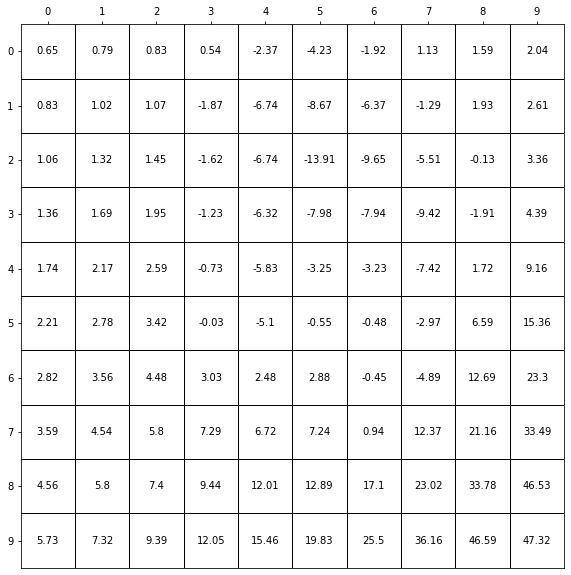

In [79]:
from matplotlib import colors

fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(-100 * np.ones((10, 10)), cmap="Greys", norm=colors.CenteredNorm(0))

ax.set_xticks(np.arange(10), minor=False)
ax.set_xticks(0.5 + np.arange(10), minor=True)
ax.set_yticks(np.arange(10), minor=False)
ax.set_yticks(0.5 + np.arange(10), minor=True)

# Loop over data dimensions and create text annotations.
for i in range(10):
    for j in range(10):
        text = ax.text(j, i, round(V2[i, j], 2),
                       ha="center", va="center", color="black")

ax.tick_params(top=True, bottom=False,
               labeltop=True, labelbottom=False)

ax.grid(which="minor", color="black", linestyle='-', linewidth=1)
ax.tick_params(which="minor", bottom=False, left=False)

plt.savefig('plots/q6-v2.png')

We can see that the values are poor at obstacles and good at the end.

# Question 7

Generate a heat map of the optimal state values (found in question 6) across the 2-D grid. For generating the heat map, you can use the same function provided in the hint earlier. Explain the distribution of the optimal state values across the 2-D grid. (Hint: Use the figure generated in this question to explain)

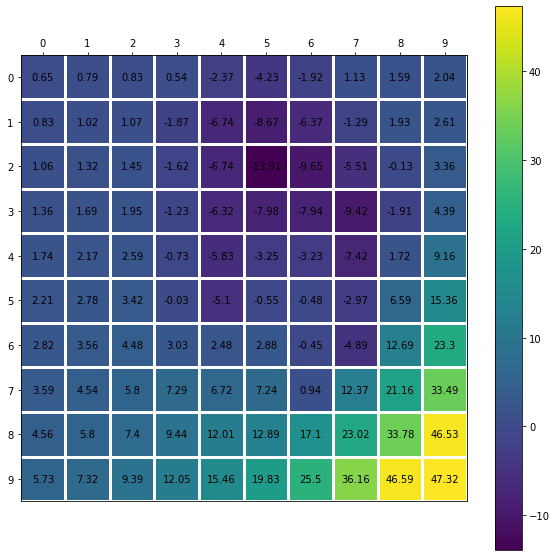

In [84]:
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(V2)

ax.set_xticks(np.arange(10), minor=False)
ax.set_xticks(0.5 + np.arange(10), minor=True)
ax.set_yticks(np.arange(10), minor=False)
ax.set_yticks(0.5 + np.arange(10), minor=True)

# Loop over data dimensions and create text annotations.
for i in range(10):
    for j in range(10):
        text = ax.text(j, i, round(V2[i, j], 2),
                       ha="center", va="center", color="black")

ax.tick_params(top=True, bottom=False,
               labeltop=True, labelbottom=False)

cbar = ax.figure.colorbar(im, ax=ax)

ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
ax.tick_params(which="minor", bottom=False, left=False)

plt.savefig('plots/q7-v2.png')

# Question 8

Implement the computation step of the value iteration algorithm (lines 14-17) to compute the optimal policy of the agent navigating the 2-D state-space. For visualization purpose, you should generate a figure similar to that of figure 1 but with the number of state replaced by the optimal action at that state. The optimal actions should be displayed using arrows. Does the optimal policy of the agent match your intuition? Please provide a brief explanation. In this question, you should have 1 plot.

In [38]:
pi2 = computation(env2, V2)

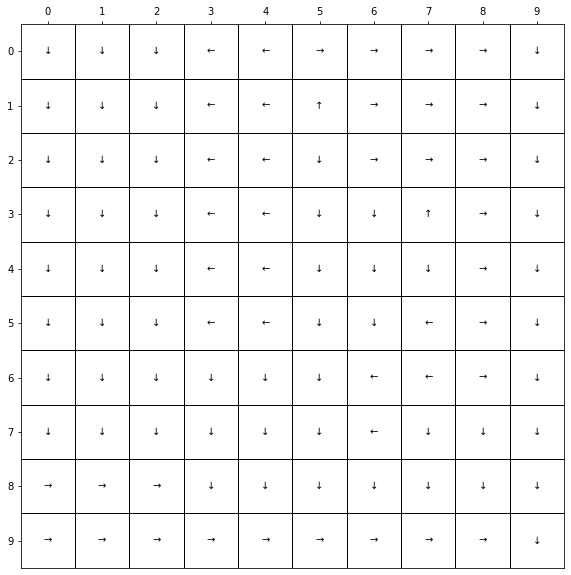

In [85]:
from matplotlib import colors

fig, ax = plt.subplots(figsize=(10,10))
temp_r2 = R2.copy()
temp_r2[9, 9] = -100
#  - temp_r2
im = ax.imshow(-100 * np.ones((10, 10)), cmap="Greys", norm=colors.CenteredNorm(0))

ax.set_xticks(np.arange(10), minor=False)
ax.set_xticks(0.5 + np.arange(10), minor=True)
ax.set_yticks(np.arange(10), minor=False)
ax.set_yticks(0.5 + np.arange(10), minor=True)

# Loop over data dimensions and create text annotations.
for i in range(10):
    for j in range(10):
        if pi2[i, j] == "top":
            text = ax.text(j, i, u'\u2191', ha="center", va="center", color="black")
        elif pi2[i, j] == "bottom":
            text = ax.text(j, i, u'\u2193', ha="center", va="center", color="black")
        elif pi2[i, j] == "left":
            text = ax.text(j, i, u'\u2190', ha="center", va="center", color="black")
        elif pi2[i, j] == "right":
            text = ax.text(j, i, u'\u2192', ha="center", va="center", color="black")

ax.tick_params(top=True, bottom=False,
               labeltop=True, labelbottom=False)

ax.grid(which="minor", color="black", linestyle='-', linewidth=1)
ax.tick_params(which="minor", bottom=False, left=False)

plt.savefig('plots/q8-p2.png')

We can see that the agent tries to avoid obstacles. As a peenalty for hittinh a wall is very high and there exist a possibility to be blown away by the wind, the agent prefers to leave a safety margin between it and a wall.

# Question 9

Change the hyper parameter $w$ to $0.6$ and and the optimal policy map similar to previous question for reward functions. Explain the differences you observe. What do you think about value of new w compared to previous value? Choose the w that you think give rise to better optimal policy and use that w for the next stages of the project.

In [47]:
# set up discount factor
gamma = 0.8
# set wind probability
w = 0.6
# set new transition probabiities
P2 = transition_probabilities(w)
# create new environments
env3 = EnvironmentRL(S, A, P2, R1, gamma) 
env4 = EnvironmentRL(S, A, P2, R2, gamma)

In [48]:
# do value iteration for environments
V3, _ = value_iteration(env3, eps)
V4, _ = value_iteration(env4, eps)
# compute optimal policy for environments
pi3 = computation(env3, V3)
pi4 = computation(env4, V4)

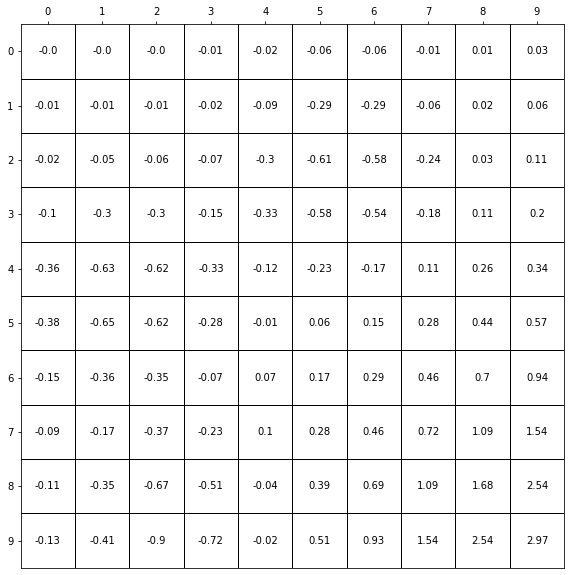

In [86]:
from matplotlib import colors

fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(-100 * np.ones((10, 10)), cmap="Greys", norm=colors.CenteredNorm(0))

ax.set_xticks(np.arange(10), minor=False)
ax.set_xticks(0.5 + np.arange(10), minor=True)
ax.set_yticks(np.arange(10), minor=False)
ax.set_yticks(0.5 + np.arange(10), minor=True)

# Loop over data dimensions and create text annotations.
for i in range(10):
    for j in range(10):
        text = ax.text(j, i, round(V3[i, j], 2),
                       ha="center", va="center", color="black")

ax.tick_params(top=True, bottom=False,
               labeltop=True, labelbottom=False)

ax.grid(which="minor", color="black", linestyle='-', linewidth=1)
ax.tick_params(which="minor", bottom=False, left=False)

plt.savefig('plots/q9-v3.png')

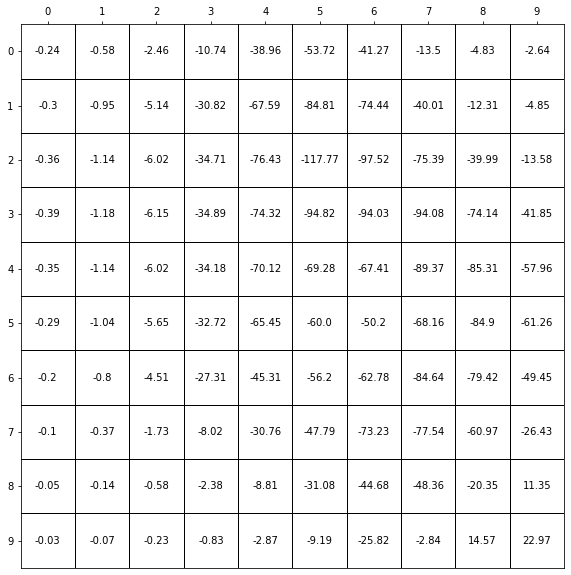

In [87]:
from matplotlib import colors

fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(-100 * np.ones((10, 10)), cmap="Greys", norm=colors.CenteredNorm(0))

ax.set_xticks(np.arange(10), minor=False)
ax.set_xticks(0.5 + np.arange(10), minor=True)
ax.set_yticks(np.arange(10), minor=False)
ax.set_yticks(0.5 + np.arange(10), minor=True)

# Loop over data dimensions and create text annotations.
for i in range(10):
    for j in range(10):
        text = ax.text(j, i, round(V4[i, j], 2),
                       ha="center", va="center", color="black")

ax.tick_params(top=True, bottom=False,
               labeltop=True, labelbottom=False)

ax.grid(which="minor", color="black", linestyle='-', linewidth=1)
ax.tick_params(which="minor", bottom=False, left=False)

plt.savefig('plots/q9-v4.png')

In both cases values are much lower, because control is less precise

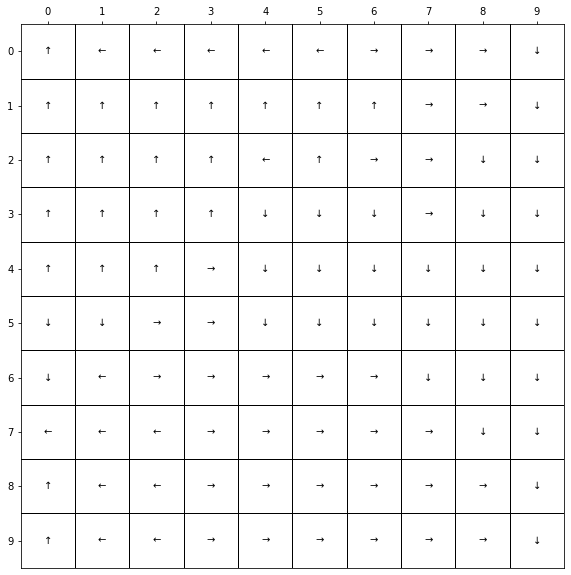

In [88]:
from matplotlib import colors

fig, ax = plt.subplots(figsize=(10,10))
# + 100 * np.abs(R1)
im = ax.imshow( -100 * np.ones((10, 10)) , cmap="Greys", norm=colors.CenteredNorm(0))

ax.set_xticks(np.arange(10), minor=False)
ax.set_xticks(0.5 + np.arange(10), minor=True)
ax.set_yticks(np.arange(10), minor=False)
ax.set_yticks(0.5 + np.arange(10), minor=True)

# Loop over data dimensions and create text annotations.
for i in range(10):
    for j in range(10):
        if pi3[i, j] == "top":
            text = ax.text(j, i, u'\u2191', ha="center", va="center", color="black")
        elif pi3[i, j] == "bottom":
            text = ax.text(j, i, u'\u2193', ha="center", va="center", color="black")
        elif pi3[i, j] == "left":
            text = ax.text(j, i, u'\u2190', ha="center", va="center", color="black")
        elif pi3[i, j] == "right":
            text = ax.text(j, i, u'\u2192', ha="center", va="center", color="black")

ax.tick_params(top=True, bottom=False,
               labeltop=True, labelbottom=False)

ax.grid(which="minor", color="black", linestyle='-', linewidth=1)
ax.tick_params(which="minor", bottom=False, left=False)

plt.savefig('plots/q9-p3.png')

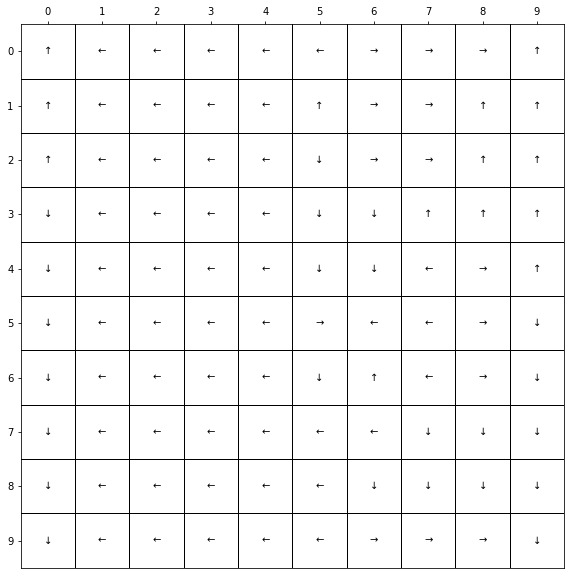

In [89]:
from matplotlib import colors

fig, ax = plt.subplots(figsize=(10,10))
temp_r2 = R2.copy()
temp_r2[9, 9] = -100
# - temp_r2
im = ax.imshow(-100 * np.ones((10, 10)) , cmap="Greys", norm=colors.CenteredNorm(0))

ax.set_xticks(np.arange(10), minor=False)
ax.set_xticks(0.5 + np.arange(10), minor=True)
ax.set_yticks(np.arange(10), minor=False)
ax.set_yticks(0.5 + np.arange(10), minor=True)

# Loop over data dimensions and create text annotations.
for i in range(10):
    for j in range(10):
        if pi4[i, j] == "top":
            text = ax.text(j, i, u'\u2191', ha="center", va="center", color="black")
        elif pi4[i, j] == "bottom":
            text = ax.text(j, i, u'\u2193', ha="center", va="center", color="black")
        elif pi4[i, j] == "left":
            text = ax.text(j, i, u'\u2190', ha="center", va="center", color="black")
        elif pi4[i, j] == "right":
            text = ax.text(j, i, u'\u2192', ha="center", va="center", color="black")

ax.tick_params(top=True, bottom=False,
               labeltop=True, labelbottom=False)

ax.grid(which="minor", color="black", linestyle='-', linewidth=1)
ax.tick_params(which="minor", bottom=False, left=False)

plt.savefig('plots/q9-p4.png')

we see that in case 2 agent tries to avoid obstacles as much as possible because of the strong wind. From some points, it does not even try to go to the end state, because it has too high risk.

# Question 10

Express $\mathbf{c}$, $\mathbf{x}$, $\mathbf{D}$, $\mathbf{b}$ in terms of $\mathbf{R}$, $\mathbf{P}_a$, $\mathbf{P}_{a_{1}}$, $t_i$, $\mathbf{u}$, $\lambda$ and $R_{max}$

To reformulate the problem

$$ max_{\mathbf{R}, \; t_i, \; u_i } \sum_{i=1}^{|S|} (t_i - \lambda u_i)$$
$$ subject \; to\; \Bigg[ \Big( \mathbf{P}_{a_1}(i) - \mathbf{P}_{a}(i) \Big) \Big( \mathbf{I} - \gamma \mathbf{P}_{a_1} \Big)^{-1} \mathbf{R} \Bigg] \geq t_i, \;\; \forall \; a \in A \setminus a_1, \; \forall \; i \in S$$
$$ \Big( \mathbf{P}_{a_1} - \mathbf{P}_{a} \Big) \Big( \mathbf{I} - \gamma \mathbf{P}_{a_1} \Big)^{-1} \mathbf{R}  \geq 0, \;\; \forall \; a \in A \setminus a_1 $$
$$ - \mathbf{u} \leq \mathbf{R} \leq \mathbf{u} $$
$$ |\mathbf{R}_i| \leq R_{max}, \;\; \forall \; i \in S $$


As the problem

$$ max_{\mathbf{x}} \; \mathbf{c}^T \mathbf{x} $$
$$ subject \; to\; \mathbf{D} \mathbf{x} \leq \mathbf{b} \;\; \forall \; a \in A \setminus a_1 $$

We need to set

$$c = \begin{bmatrix}\mathbf{1} \\ -\lambda\mathbf{1} \\\mathbf{0} \end{bmatrix}, \;\; x = \begin{bmatrix}\mathbf{t} \\ \mathbf{u} \\\mathbf{R} \end{bmatrix}$$

$$D=
\begin{bmatrix} 
\mathbf{I} & \mathbf{0} & -(\mathbf{P_a}-\mathbf{P_{a1}})(\mathbf{I}-\gamma \mathbf{P_{a1}})^{-1} \\ 
\mathbf{0} & \mathbf{0} & -(\mathbf{P_a}-\mathbf{P_{a1}})(\mathbf{I}-\gamma \mathbf{P_{a1}})^{-1} \\ 
\mathbf{0} & \mathbf{-I}  & \mathbf{I} \\ 
\mathbf{0} & \mathbf{-I}  & \mathbf{-I} \\
\mathbf{0} & \mathbf{0} & \mathbf{I}  \\ 
\mathbf{0} & \mathbf{0} & \mathbf{-I}  
\end{bmatrix}, \;\; b = \begin{bmatrix}
\mathbf{0} \\ 
\mathbf{0} \\
\mathbf{0} \\ 
\mathbf{0} \\ 
\mathbf{R_{max}} \\
\mathbf{R_{max}} 
\end{bmatrix}$$


# Question 11

Sweep $\lambda$ from $0$ to $5$ to get $500$ evenly spaced values for $\lambda$. For each value of $\lambda$ compute $O_A(s)$ by following the process described above. For this problem, use the optimal policy of the agent found in question $5$ to fill in the $O_E(s)$ values. Then use equation 3 to compute the accuracy of the IRL algorithm for this value of $\lambda$. You need to repeat the above process for all $500$ values of $\lambda$ to get $500$ data points. Plot $\lambda$ (x-axis) against Accuracy (y-axis). In this question, you should have 1 plot.

**Note:** obviously, we will use $w = 0.1$ for the IRL section of this project

In [54]:
def irl_cvxopt(environment, policy, lbd, Rmax):
    # calculate size of the state space
    S = environment.S.shape[0] * environment.S.shape[0]
    # create weight vector
    c = np.ones((S,1))
    c = np.vstack((c,(-lbd*c)))
    c = np.vstack((c,np.zeros((S,1))))
    # create a vector of constraints
    b = np.vstack((np.zeros((S,1)),np.zeros((S,1)),np.zeros((S,1)),np.zeros((S,1)),np.zeros((S,1)),np.zeros((S,1)),np.zeros((S,1)),np.zeros((S,1)),
                   Rmax*np.ones((S,1)),Rmax*np.ones((S,1))))
    
    # calculate P_a matrix
    # method flatten takes the first row, then appends the second row to it, then the third and so on
    # this is why to perserve the order of rows in P_a we need to add rows in the same order, starting at [0, 0],
    # then [0, 1], then ..., then [0, 9], then [1, 0] and so on
    # init P_a with the first state 
    P_a = environment.P[(policy[0, 0], 0, 0)].flatten()
    Pa1 = np.zeros((S,S))
    for y in range(environment.S.shape[1]):
        for x in range(environment.S.shape[0]):
            # skip the first state
            if not (x == 0 and y == 0):
                # get a new row
                new_row = environment.P[(policy[y, x], x, y)].flatten()
                # append it to P_a
                P_a = np.vstack((P_a, new_row))
    # get an identity matrix
    iden = np.identity(environment.S.flatten().shape[0])
    # calculate the inverse
    cur_inv = np.linalg.inv(iden - lbd * P_a)

    # boolean variable to check if we already have matrix D to append to
    first = 0
    for y in range(environment.S.shape[1]):
        for x in range(environment.S.shape[0]):
            # for each action the constraints are separate
            for action in environment.A:
                # constraints exist only for non-optimal action
                if not (action == policy[y, x]):
                    # we need to reproduce (P_a1[i] - P_a[i]) @ inv @ R >= t_i
                    # let's calculate (P_a1[i] - P_a[i]) @ inv
                    weights = (P_a[10 * y + x] - environment.P[(action, x, y)].flatten()) @ cur_inv
                    # now let's reformulate original problem as t_i - (P_a1[i] - P_a[i]) @ inv @ R <= 0
                    # we need to create a vector that has -1 for t_i and weights for R
                    eq2 = np.zeros((S))
                    eq2[10 * y + x] = -1
                    output = np.hstack((eq2, np.zeros(S), weights))
                    # we double this vector with weights variable to represent (P_a1[i] - P_a[i]) @ inv @ R >= 0
                    output1 = np.hstack((np.zeros(S), np.zeros(S), weights))
                    # we store both at temp variable and add them to eq, which is a block matrix
                    temp = np.vstack((output,output1))
                    if first == 0:
                        eq = temp
                        first = 1
                    else:
                        eq = np.vstack((eq, temp))
                      
    # we invert block matrix to account for negative signs (see on top)
    D = -eq
    # add -u + r <= 0
    D = np.vstack((D, np.hstack((np.zeros((S,S)),-np.eye((S)),np.eye((S))))))
    # add -u - r <= 0
    D = np.vstack((D, np.hstack((np.zeros((S,S)),-np.eye((S)),-np.eye((S))))))
    # add r <= R_max
    D = np.vstack((D, np.hstack((np.zeros((S,S)),np.zeros((S,S)),np.eye((S))))))
    # add -r <= R_max
    D = np.vstack((D, np.hstack((np.zeros((S,S)),np.zeros((S,S)),-np.eye((S))))))
    
    # Create cvxopt objects from the produced matrices
    c = matrix(c)
    b = matrix(b)
    G = matrix(D)
    # solve the problem
    # max cx
    # Gx + s = b
    solvers.options['show_progress'] = False
    try:
        # solve the problem
        sol=solvers.lp(-c,G,b)
        solution = sol['x'][-100:]
        inc = 0
        R = np.zeros((environment.S.shape[0],environment.S.shape[0]))
        for i in range(environment.S.shape[0]):
            for j in range(environment.S.shape[0]):
                R[i,j] = solution[inc]
                inc = inc + 1
    except ValueError:
        R = np.zeros((10,10))
        
    return R      

In [55]:
def irl_cvxpy(environment, policy, lbd, Rmax):
    # calculate P_a matrix
    # method flatten takes the first row, then appends the second row to it, then the third and so on
    # this is why to perserve the order of rows in P_a we need to add rows in the same order, starting at [0, 0],
    # then [0, 1], then ..., then [0, 9], then [1, 0] and so on
    # init P_a with the first state 
    P_a = environment.P[(policy[0, 0], 0, 0)].flatten()
    for y in range(environment.S.shape[1]):
        for x in range(environment.S.shape[0]):
            # skip the first state
            if not (x == 0 and y == 0):
                # get a new row
                new_row = environment.P[(policy[y, x], x, y)].flatten()
                # append it to P_a
                P_a = np.vstack((P_a, new_row))
    # get an identity matrix
    iden = np.identity(environment.S.flatten().shape[0])
    # calculate the inverse
    cur_inv = np.linalg.inv(iden - lbd * P_a)
    
    # initialize optimization variables
    # the variables included here are (R, t, u), each of which is from R^|S|
    R = cp.Variable(environment.S.flatten().shape[0])
    t = cp.Variable(environment.S.flatten().shape[0])
    u = cp.Variable(environment.S.flatten().shape[0])
    # declare loss; it is the reverse of the thing we want to maximize
    loss = -cp.sum(t - lbd * u)
    # declare objective
    objective = cp.Minimize(loss)
    # declare constraints
    constraints = []
    # declare constraints on the values of R, u
    constraints.append(R <= u)
    constraints.append(-u <= R)
    constraints.append(R <= Rmax * np.ones(environment.S.flatten().shape[0]))
    constraints.append(-R <= Rmax * np.ones(environment.S.flatten().shape[0]))
    # declare constraints on the states
    for y in range(environment.S.shape[1]):
        for x in range(environment.S.shape[0]):
            # for each action the constraints are separate
            for action in environment.A:
                # constraints exist only for non-optimal action
                if not (action == policy[y, x]):
                    # calculate left par of the equation
                    weights = (P_a[10 * y + x] - environment.P[(action, x, y)].flatten()) @ cur_inv 
                    # add constraints
                    constraints.append(weights @ R >= t[10 * y + x])
                    constraints.append(weights @ R >= 0)
                    
    # solve the problem
    prob = cp.Problem(objective, constraints)
    try:
        result = prob.solve(solver = cp.SCS)
    except cp.SolverError:
        print("solver failed!")
        return np.zeros((10, 10))
    
    # output solution if possible
    if prob.status == "infeasible":
        print("Problem is infeasible!")
        return np.zeros((10, 10))
    elif prob.status == "unbounded":
        print("Problem is unbounded!")
        return np.zeros((10, 10))
    else:
        pred_R = R.value
        pred_R = pred_R.reshape((10, 10))
        return pred_R

In [64]:
def irl(environment, policy, lbd, Rmax):
    # try cvxopt solver
    pred_R = irl_cvxopt(environment, policy, lbd, Rmax)
    # if solver failed
    if np.all(pred_R == 0):
        # try cvxpy solver
        pred_R = irl_cvxpy(environment, policy, lbd, Rmax)
        
    return pred_R

In [57]:
def compare_policies(policy_1, policy_2):
    # this function calculates accuracy according to the equation 3 in the project spec
    # init counter
    accuracy = 0
    # sweep overl all states
    for i in range(policy_1.shape[0]):
        for j in range(policy_1.shape[1]):
            # check if actions are the same
            if policy_1[i, j] == policy_2[i, j]:
                # update counter
                accuracy += 1
    # normilize counter
    accuracy /= policy_1.flatten().shape[0]
    return accuracy

In [65]:
# declare number of lambda points to test over
NUM_POINTS = 500

# set all necessary constants for creating an environment
S = np.arange(100).reshape((10, 10)).T
A = ["top", "bottom", "left", "right"]
w = 0.1
P = transition_probabilities(w)
gamma = 0.8
eps = 0.01

# init the vector of accuracies
accs = np.zeros((NUM_POINTS+1))
# init lambdas to sweep through
lambdas = np.linspace(0, 5, num=NUM_POINTS+1)
# sweep through them
for i in range(lambdas.shape[0]):
    # compute reverse-engineered R
    irl_R = irl(env1, pi1, lambdas[i], np.max(np.abs(R1)))
    # create temporary RL environment
    irl_env = EnvironmentRL(S, A, P, irl_R, gamma)
    # do value iteration on it
    irl_V, _ = value_iteration(irl_env, eps)
    # fetch optimal policy
    irl_pi = computation(irl_env, irl_V)
    # compare policies and store accuracy
    accs[i] = compare_policies(pi1, irl_pi)

C:\Users\slavc\Desktop\UCLA\Courses\Spring_2021\232E\232E\venv_232E\lib\site-packages\cvxpy\problems\problem.py:1267: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


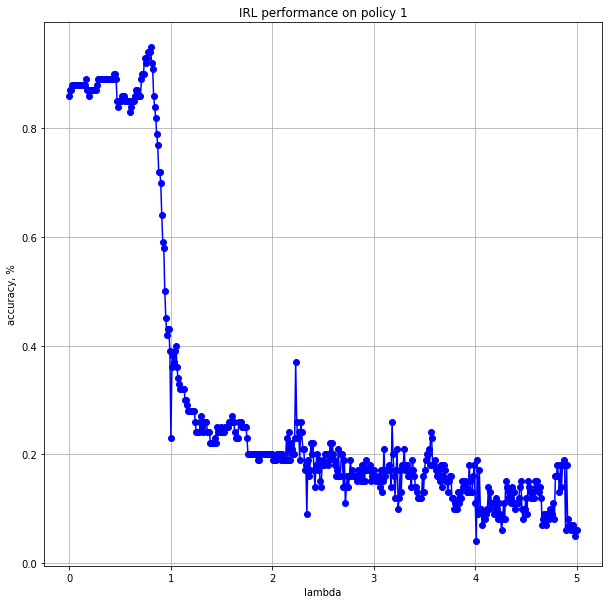

In [67]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(lambdas, accs, "-ob")
ax.grid()
ax.title.set_text("IRL performance on policy 1")
ax.set_xlabel('lambda')
ax.set_ylabel('accuracy, %')
plt.savefig('plots/q11-pi1.png')

# Question 12

Use the plot in question 11 to compute the value of $\lambda$ for which accuracy is maximum. For future reference we will denote this value as $\lambda^{(1)}_{max}$. Please report $\lambda^{(1)}_{max}$

In [130]:
lbd_max_1 = lambdas[np.argmax(accs)]
lbd_max = 0.8
print("Lambda Max: ", lbd_max_1)

Lambda Max:  0.8


# Question 13

For $\lambda^{(1)}_{max}$, generate heat maps of the ground truth reward and the extracted reward. Please note that the ground truth reward is the Reward function 1 and the extracted reward is computed by solving the linear program given by equation 2 with the $\lambda$ parameter set to $\lambda^{(1)}_{max}$. In this question, you should have 2 plots.

In [131]:
# recreate all parameters of env1
R1 = create_reward([(1, 4, -1), (1, 5, -1), (2, 4, -1), (2, 5, -1), 
                    (2, 8, -1), (2, 9, -1), (3, 8, -1), (3, 9, -1),
                    (5, 2, -1), (5, 3, -1), (6, 2, -1), (6, 3, -1),
                    (9, 9, 1)])
S = np.arange(100).reshape((10, 10)).T
A = ["top", "bottom", "left", "right"]
w = 0.1
P = transition_probabilities(w)
gamma = 0.8
eps = 0.01

# compute reverse-engineered R
irl_R1 = irl(env1, pi1, lbd_max_1, np.max(np.abs(R1)))
# create temporary RL environment
irl_env1 = EnvironmentRL(S, A, P, irl_R1, gamma)
# do value iteration on it
irl_V1, irl_rec1 = value_iteration(irl_env1, eps)
# fetch optimal policy
irl_pi1 = computation(irl_env1, irl_V1)
# compare policies
print(compare_policies(pi1, irl_pi1))

0.95


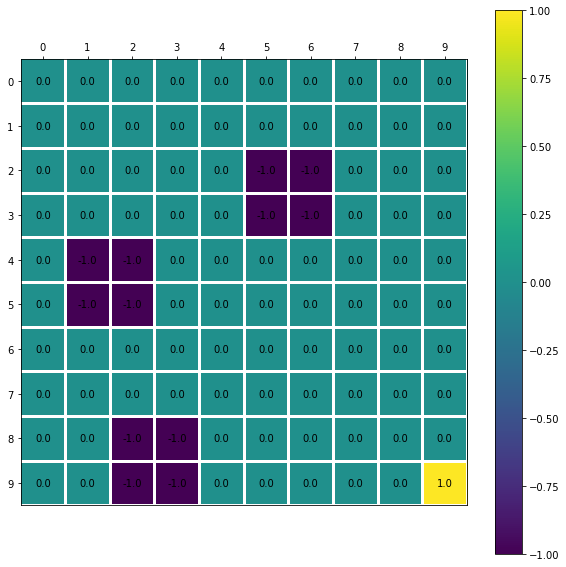

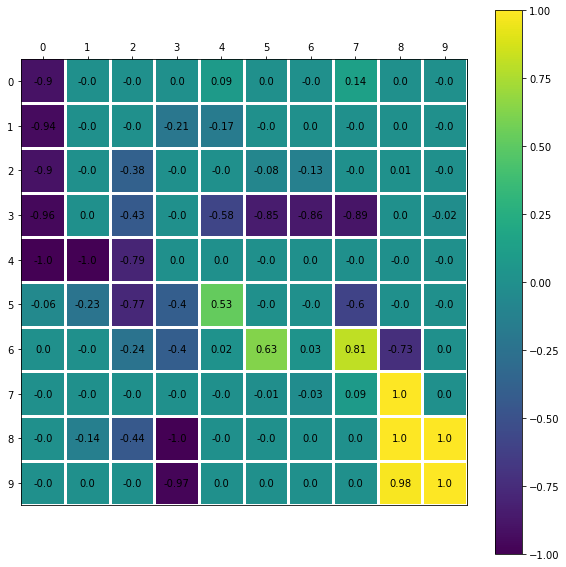

In [103]:
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(R1)

ax.set_xticks(np.arange(10), minor=False)
ax.set_xticks(0.5 + np.arange(10), minor=True)
ax.set_yticks(np.arange(10), minor=False)
ax.set_yticks(0.5 + np.arange(10), minor=True)

# Loop over data dimensions and create text annotations.
for i in range(10):
    for j in range(10):
        text = ax.text(j, i, R1[i, j],
                       ha="center", va="center", color="black")

ax.tick_params(top=True, bottom=False,
               labeltop=True, labelbottom=False)

cbar = ax.figure.colorbar(im, ax=ax)

ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
ax.tick_params(which="minor", bottom=False, left=False)


plt.savefig('plots/q13-r1.png')


fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(irl_R1)

ax.set_xticks(np.arange(10), minor=False)
ax.set_xticks(0.5 + np.arange(10), minor=True)
ax.set_yticks(np.arange(10), minor=False)
ax.set_yticks(0.5 + np.arange(10), minor=True)

irl_R1 = irl_R1.round(decimals = 2)
# Loop over data dimensions and create text annotations.
for i in range(10):
    for j in range(10):
        text = ax.text(j, i, irl_R1[i, j],
                       ha="center", va="center", color="black")

ax.tick_params(top=True, bottom=False,
               labeltop=True, labelbottom=False)

cbar = ax.figure.colorbar(im, ax=ax)

ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
ax.tick_params(which="minor", bottom=False, left=False)

plt.savefig('plots/q13-irl-r.png')

# Question 14

 Use the extracted reward function computed in question 13, to compute the
optimal values of the states in the 2-D grid. For computing the optimal values you need to use the
optimal state-value function that you wrote in question 2. For visualization purpose, generate a heat
map of the optimal state values across the 2-D grid (similar to the figure generated in question 3). In
this question, you should have 1 plot.

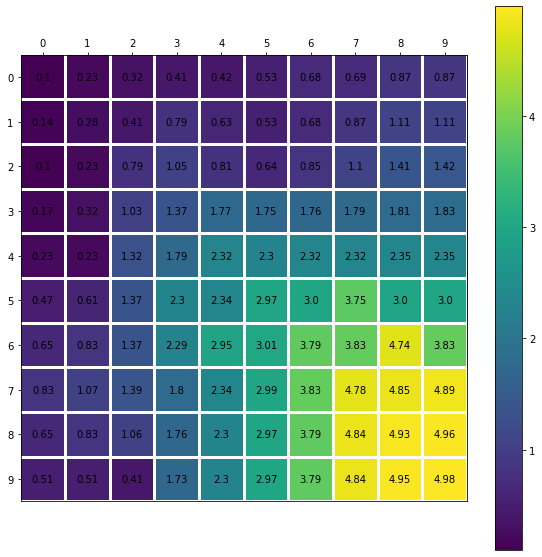

In [105]:
from matplotlib import colors

fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow((irl_V1))

ax.set_xticks(np.arange(10), minor=False)
ax.set_xticks(0.5 + np.arange(10), minor=True)
ax.set_yticks(np.arange(10), minor=False)
ax.set_yticks(0.5 + np.arange(10), minor=True)

# Loop over data dimensions and create text annotations.
for i in range(10):
    for j in range(10):
        text = ax.text(j, i, round(irl_V1[i, j], 2),
                       ha="center", va="center", color="black")
cbar = ax.figure.colorbar(im, ax=ax)

ax.tick_params(top=True, bottom=False,
               labeltop=True, labelbottom=False)

ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
ax.tick_params(which="minor", bottom=False, left=False)

plt.savefig('plots/q14.png')

# Question 15


 Compare the heat maps of Question 3 and Question 14 and provide a brief
explanation on their similarities and differences.

# Question 16

 Use the extracted reward function found in question 13 to compute the optimal
policy of the agent. For computing the optimal policy of the agent you need to use the function that
you wrote in question 5. For visualization purpose, you should generate a figure similar to that of figure
1 but with the number of state replaced by the optimal action at that state. The actions should be
displayed using arrows. In this question, you should have 1 plot.


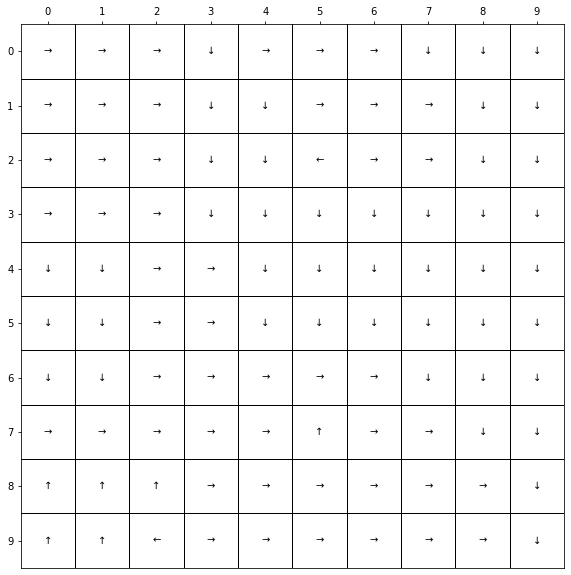

In [127]:
from matplotlib import colors

fig, ax = plt.subplots(figsize=(10,10))
# + 100 * np.abs(R1)
im = ax.imshow( -100 * np.ones((10, 10)), cmap="Greys", norm=colors.CenteredNorm(0))

ax.set_xticks(np.arange(10), minor=False)
ax.set_xticks(0.5 + np.arange(10), minor=True)
ax.set_yticks(np.arange(10), minor=False)
ax.set_yticks(0.5 + np.arange(10), minor=True)

# Loop over data dimensions and create text annotations.
for i in range(10):
    for j in range(10):
        if irl_pi1[i, j] == "top":
            text = ax.text(j, i, u'\u2191', ha="center", va="center", color="black")
        elif irl_pi1[i, j] == "bottom":
            text = ax.text(j, i, u'\u2193', ha="center", va="center", color="black")
        elif irl_pi1[i, j] == "left":
            text = ax.text(j, i, u'\u2190', ha="center", va="center", color="black")
        elif irl_pi1[i, j] == "right":
            text = ax.text(j, i, u'\u2192', ha="center", va="center", color="black")

ax.tick_params(top=True, bottom=False,
               labeltop=True, labelbottom=False)

ax.grid(which="minor", color="black", linestyle='-', linewidth=1)
ax.tick_params(which="minor", bottom=False, left=False)

plt.savefig('plots/q16.png')

# Question 17



Compare the figures of Question 5 and Question 16 and provide a brief explanation on their similarities and differences.

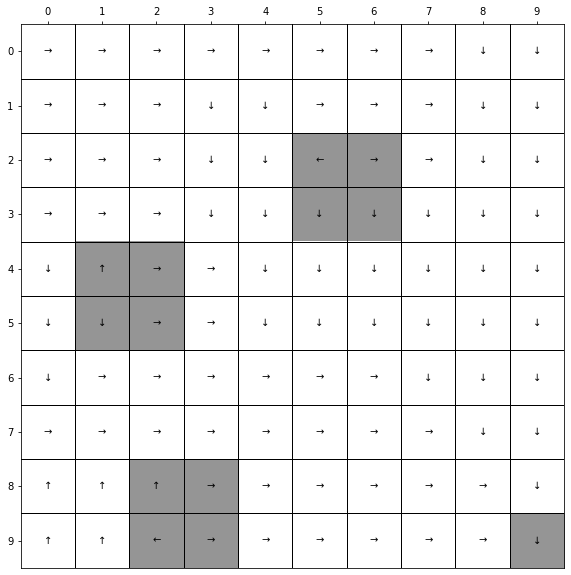

In [132]:
from matplotlib import colors

fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow( -100 * np.ones((10, 10)) + 100 * np.abs(R1), cmap="Greys", norm=colors.CenteredNorm(0))

ax.set_xticks(np.arange(10), minor=False)
ax.set_xticks(0.5 + np.arange(10), minor=True)
ax.set_yticks(np.arange(10), minor=False)
ax.set_yticks(0.5 + np.arange(10), minor=True)

# Loop over data dimensions and create text annotations.
for i in range(10):
    for j in range(10):
        if pi1[i, j] == "top":
            text = ax.text(j, i, u'\u2191', ha="center", va="center", color="black")
        elif pi1[i, j] == "bottom":
            text = ax.text(j, i, u'\u2193', ha="center", va="center", color="black")
        elif pi1[i, j] == "left":
            text = ax.text(j, i, u'\u2190', ha="center", va="center", color="black")
        elif pi1[i, j] == "right":
            text = ax.text(j, i, u'\u2192', ha="center", va="center", color="black")

ax.tick_params(top=True, bottom=False,
               labeltop=True, labelbottom=False)

ax.grid(which="minor", color="black", linestyle='-', linewidth=1)
ax.tick_params(which="minor", bottom=False, left=False)

plt.savefig('plots/q17-gt.png')

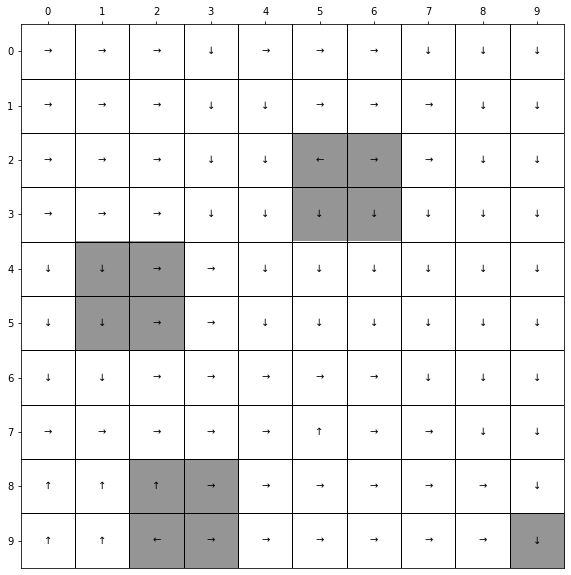

In [133]:
from matplotlib import colors

fig, ax = plt.subplots(figsize=(10,10))
# 
im = ax.imshow( -100 * np.ones((10, 10)) + 100 * np.abs(R1), cmap="Greys", norm=colors.CenteredNorm(0))

ax.set_xticks(np.arange(10), minor=False)
ax.set_xticks(0.5 + np.arange(10), minor=True)
ax.set_yticks(np.arange(10), minor=False)
ax.set_yticks(0.5 + np.arange(10), minor=True)

# Loop over data dimensions and create text annotations.
for i in range(10):
    for j in range(10):
        if irl_pi1[i, j] == "top":
            text = ax.text(j, i, u'\u2191', ha="center", va="center", color="black")
        elif irl_pi1[i, j] == "bottom":
            text = ax.text(j, i, u'\u2193', ha="center", va="center", color="black")
        elif irl_pi1[i, j] == "left":
            text = ax.text(j, i, u'\u2190', ha="center", va="center", color="black")
        elif irl_pi1[i, j] == "right":
            text = ax.text(j, i, u'\u2192', ha="center", va="center", color="black")

ax.tick_params(top=True, bottom=False,
               labeltop=True, labelbottom=False)

ax.grid(which="minor", color="black", linestyle='-', linewidth=1)
ax.tick_params(which="minor", bottom=False, left=False)

plt.savefig('plots/q17-irl.png')

# Question 18


Sweep $\lambda$ from $0$ to $5$ to get $500$ evenly spaced values for $\lambda$. For each value of $\lambda$ compute $O_A(s)$ by following the process described above. For this problem, use the optimal policy of the agent found in question $9$ to fill in the $O_E(s)$ values. Then use equation 3 to compute the accuracy of the IRL algorithm for this value of $\lambda$. You need to repeat the above process for all $500$ values of $\lambda$ to get $500$ data points. Plot $\lambda$ (x-axis) against Accuracy (y-axis). In this question, you should have 1 plot.

In [106]:
# declare number of lambda points to test over
NUM_POINTS = 500

# set all necessary constants for creating an environment
S = np.arange(100).reshape((10, 10)).T
A = ["top", "bottom", "left", "right"]
w = 0.1
P = transition_probabilities(w)
gamma = 0.8
eps = 0.01

# init the vector of accuracies
accs2 = np.zeros((NUM_POINTS+1))
# init lambdas to sweep through
lambdas = np.linspace(0, 5, num=NUM_POINTS+1)
# sweep through them
for i in range(lambdas.shape[0]):
    # compute reverse-engineered R
    irl_R2 = irl(env2, pi2, lambdas[i], np.max(np.abs(R2)))
    # create temporary RL environment
    irl_env2 = EnvironmentRL(S, A, P, irl_R2, gamma)
    # do value iteration on it
    irl_V2, _ = value_iteration(irl_env2, eps)
    # fetch optimal policy
    irl_pi2 = computation(irl_env2, irl_V2)
    # compare policies and store accuracy
    accs2[i] = compare_policies(pi2, irl_pi2)

C:\Users\slavc\Desktop\UCLA\Courses\Spring_2021\232E\232E\venv_232E\lib\site-packages\cvxpy\problems\problem.py:1267: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


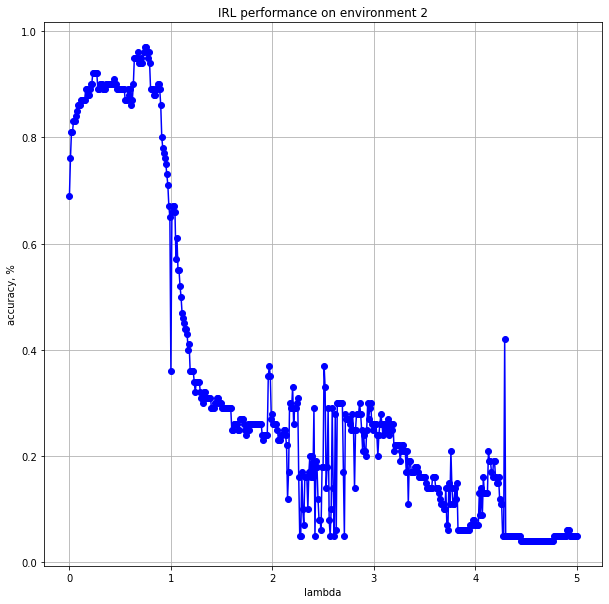

In [107]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(lambdas, accs2, "-ob")
ax.grid()
ax.title.set_text("IRL performance on environment 2")
ax.set_xlabel('lambda')
ax.set_ylabel('accuracy, %')
plt.savefig('plots/q18-pi2.png')

# Question 19

Use the plot in question 18 to compute the value of $\lambda$ for which accuracy is maximum. For future reference we will denote this value as $\lambda^{(2)}_{max}$. Please report $\lambda^{(2)}_{max}$

In [134]:
lbd_max2 = lambdas[np.argmax(accs2)]
# lbd_max2 = 0.74
print("Lambda Max: ", lbd_max2)

Lambda Max:  0.74


# Question 20
For $\lambda^{(2)}_{max}$, generate heat maps of the ground truth reward and the extracted reward. Please note that the ground truth reward is the Reward function 2 and the extracted reward is computed by solving the linear program given by equation 2 with the $\lambda$ parameter set to $\lambda^{(2)}_{max}$. In this question, you should have 2 plots.

In [135]:
# compute reverse-engineered R
R2 = create_reward([(4, 1, -100), (4, 2, -100), (4, 3, -100), (4, 4, -100), (4, 5, -100), (4, 6, -100),
                    (5, 1, -100),
                    (6, 1, -100), (6, 2, -100), (6, 3, -100), (6, 7, -100), (6, 8, -100),
                    (7, 3, -100), (7, 7, -100),
                    (8, 3, -100), (8, 4, -100), (8, 5, -100), (8, 6, -100), (8, 7, -100),
                    (9, 9, 10)])
S = np.arange(100).reshape((10, 10)).T
A = ["top", "bottom", "left", "right"]
w = 0.1
P = transition_probabilities(w)
gamma = 0.8
eps = 0.01

# compute reverse-engineered R
irl_R2 = irl(env2, pi2, lbd_max2, np.max(np.abs(R2)))
# create temporary RL environment
irl_env2 = EnvironmentRL(S, A, P, irl_R2, gamma)
# do value iteration on it
irl_V2, _ = value_iteration(irl_env2, eps)
# fetch optimal policy
irl_pi2 = computation(irl_env2, irl_V2)
# compare policies
print(compare_policies(pi2, irl_pi2))

0.97


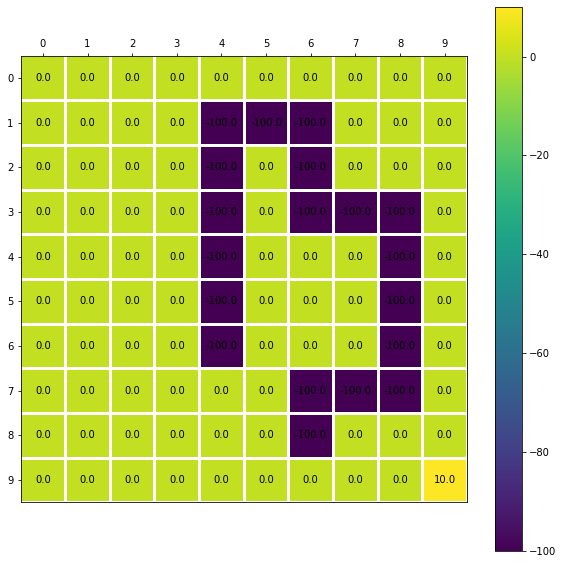

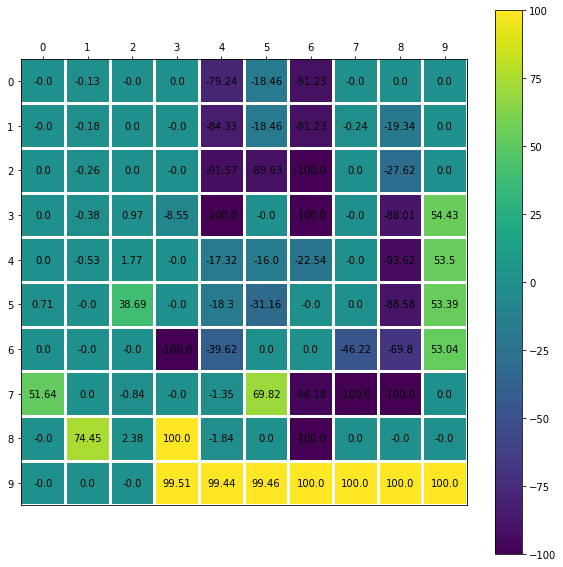

In [113]:
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(R2)

ax.set_xticks(np.arange(10), minor=False)
ax.set_xticks(0.5 + np.arange(10), minor=True)
ax.set_yticks(np.arange(10), minor=False)
ax.set_yticks(0.5 + np.arange(10), minor=True)

# Loop over data dimensions and create text annotations.
for i in range(10):
    for j in range(10):
        text = ax.text(j, i, R2[i, j],
                       ha="center", va="center", color="black")

ax.tick_params(top=True, bottom=False,
               labeltop=True, labelbottom=False)

cbar = ax.figure.colorbar(im, ax=ax)

ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
ax.tick_params(which="minor", bottom=False, left=False)

plt.savefig('plots/q20-r1.png')


fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(irl_R2)

ax.set_xticks(np.arange(10), minor=False)
ax.set_xticks(0.5 + np.arange(10), minor=True)
ax.set_yticks(np.arange(10), minor=False)
ax.set_yticks(0.5 + np.arange(10), minor=True)

irl_R2 = irl_R2.round(decimals = 2)
irl_V2 = irl_V2.round(decimals = 2)
# Loop over data dimensions and create text annotations.
for i in range(10):
    for j in range(10):
        text = ax.text(j, i, irl_R2[i, j],
                       ha="center", va="center", color="black")

ax.tick_params(top=True, bottom=False,
               labeltop=True, labelbottom=False)

cbar = ax.figure.colorbar(im, ax=ax)

ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
ax.tick_params(which="minor", bottom=False, left=False)

plt.savefig('plots/q20-irl-r.png')

# Question 21
Use the extracted reward function computed in question 20, to compute the
optimal values of the states in the 2-D grid. For computing the optimal values you need to use the
optimal state-value function that you wrote in question 2. For visualization purpose, generate a heat
map of the optimal state values across the 2-D grid (similar to the figure generated in question 7). In
this question, you should have 1 plot.


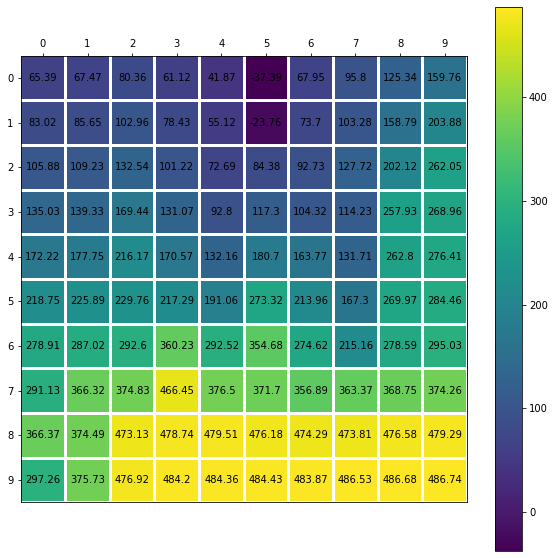

In [112]:

from matplotlib import colors

fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow((irl_V2))

ax.set_xticks(np.arange(10), minor=False)
ax.set_xticks(0.5 + np.arange(10), minor=True)
ax.set_yticks(np.arange(10), minor=False)
ax.set_yticks(0.5 + np.arange(10), minor=True)

# Loop over data dimensions and create text annotations.
for i in range(10):
    for j in range(10):
        text = ax.text(j, i, irl_V2[i, j], 
                       ha="center", va="center", color="black")
cbar = ax.figure.colorbar(im, ax=ax)

ax.tick_params(top=True, bottom=False,
               labeltop=True, labelbottom=False)

ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
ax.tick_params(which="minor", bottom=False, left=False)


plt.savefig('plots/q21.png')

# Question 22
Compare the heat maps of Question 7 and Question 21 and provide a brief
explanation on their similarities and differences.

# Question 23
Use the extracted reward function found in question 20 to compute the optimal
policy of the agent. For computing the optimal policy of the agent you need to use the function that
you wrote in question 9. For visualization purpose, you should generate a figure similar to that of figure
1 but with the number of state replaced by the optimal action at that state. The actions should be
displayed using arrows. In this question, you should have 1 plot.

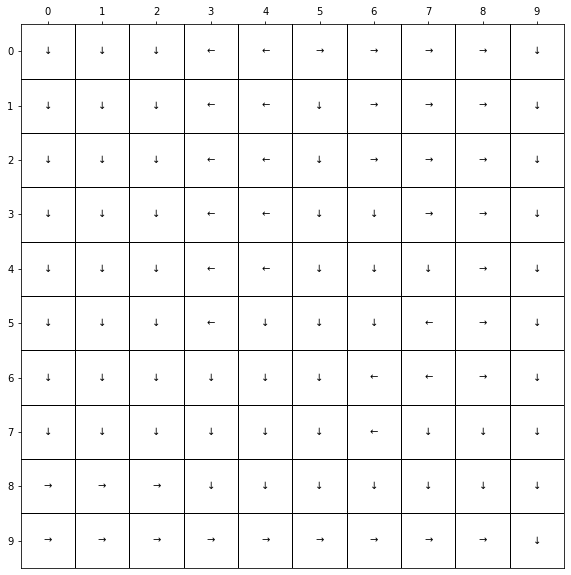

In [114]:
from matplotlib import colors

fig, ax = plt.subplots(figsize=(10,10))

im = ax.imshow(-100 * np.ones((10, 10)),cmap="Greys" ,  norm=colors.CenteredNorm(0))


ax.set_xticks(np.arange(10), minor=False)
ax.set_xticks(0.5 + np.arange(10), minor=True)
ax.set_yticks(np.arange(10), minor=False)
ax.set_yticks(0.5 + np.arange(10), minor=True)

# Loop over data dimensions and create text annotations.
for i in range(10):
    for j in range(10):
        if irl_pi2[i, j] == "top":
            text = ax.text(j, i, u'\u2191', ha="center", va="center", color="black")
        elif irl_pi2[i, j] == "bottom":
            text = ax.text(j, i, u'\u2193', ha="center", va="center", color="black")
        elif irl_pi2[i, j] == "left":
            text = ax.text(j, i, u'\u2190', ha="center", va="center", color="black")
        elif irl_pi2[i, j] == "right":
            text = ax.text(j, i, u'\u2192', ha="center", va="center", color="black")

ax.tick_params(top=True, bottom=False,
               labeltop=True, labelbottom=False)

ax.grid(which="minor", color="black", linestyle='-', linewidth=1)
ax.tick_params(which="minor", bottom=False, left=False)

plt.savefig('plots/q23.png')

# Question 24
Compare the figures of Question 9 and Question 23 and provide a brief explanation on their similarities and differences.

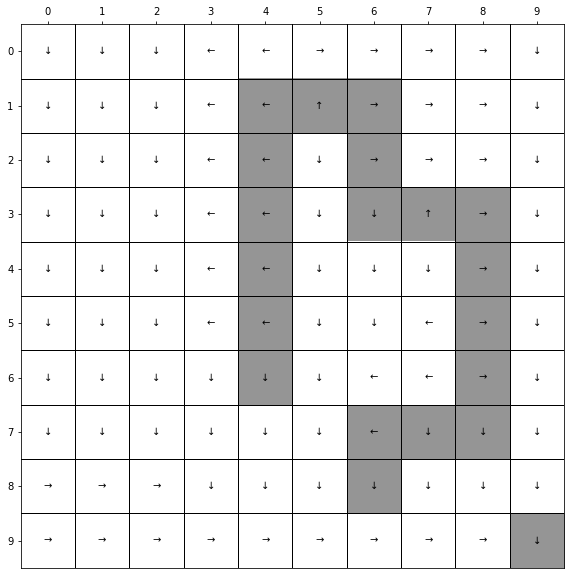

In [138]:
from matplotlib import colors

fig, ax = plt.subplots(figsize=(10,10))
temp_r2 = R2.copy()
temp_r2[9, 9] = -100
im = ax.imshow(-100 * np.ones((10, 10)) - temp_r2, cmap="Greys", norm=colors.CenteredNorm(0))

ax.set_xticks(np.arange(10), minor=False)
ax.set_xticks(0.5 + np.arange(10), minor=True)
ax.set_yticks(np.arange(10), minor=False)
ax.set_yticks(0.5 + np.arange(10), minor=True)

# Loop over data dimensions and create text annotations.
for i in range(10):
    for j in range(10):
        if pi2[i, j] == "top":
            text = ax.text(j, i, u'\u2191', ha="center", va="center", color="black")
        elif pi2[i, j] == "bottom":
            text = ax.text(j, i, u'\u2193', ha="center", va="center", color="black")
        elif pi2[i, j] == "left":
            text = ax.text(j, i, u'\u2190', ha="center", va="center", color="black")
        elif pi2[i, j] == "right":
            text = ax.text(j, i, u'\u2192', ha="center", va="center", color="black")

ax.tick_params(top=True, bottom=False,
               labeltop=True, labelbottom=False)

ax.grid(which="minor", color="black", linestyle='-', linewidth=1)
ax.tick_params(which="minor", bottom=False, left=False)

plt.savefig('plots/q24-gt.png')

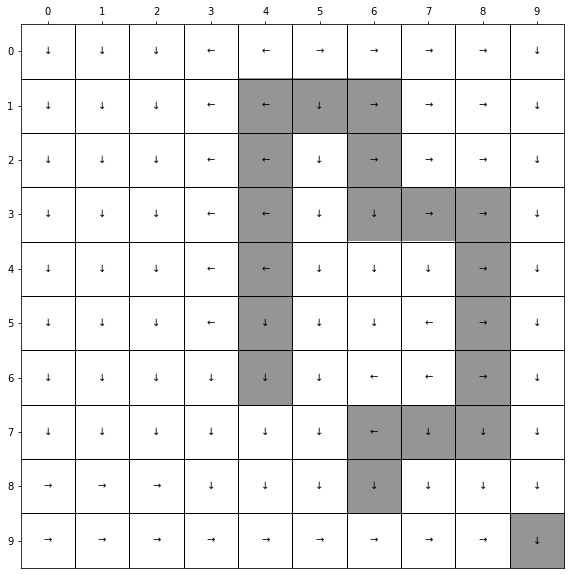

In [137]:
from matplotlib import colors

fig, ax = plt.subplots(figsize=(10,10))
temp_r = R2.copy()
temp_r[9, 9] = -100
im = ax.imshow(-100 * np.ones((10, 10)) + np.abs(temp_r),cmap="Greys" ,  norm=colors.CenteredNorm(0))


ax.set_xticks(np.arange(10), minor=False)
ax.set_xticks(0.5 + np.arange(10), minor=True)
ax.set_yticks(np.arange(10), minor=False)
ax.set_yticks(0.5 + np.arange(10), minor=True)

# Loop over data dimensions and create text annotations.
for i in range(10):
    for j in range(10):
        if irl_pi2[i, j] == "top":
            text = ax.text(j, i, u'\u2191', ha="center", va="center", color="black")
        elif irl_pi2[i, j] == "bottom":
            text = ax.text(j, i, u'\u2193', ha="center", va="center", color="black")
        elif irl_pi2[i, j] == "left":
            text = ax.text(j, i, u'\u2190', ha="center", va="center", color="black")
        elif irl_pi2[i, j] == "right":
            text = ax.text(j, i, u'\u2192', ha="center", va="center", color="black")

ax.tick_params(top=True, bottom=False,
               labeltop=True, labelbottom=False)

ax.grid(which="minor", color="black", linestyle='-', linewidth=1)
ax.tick_params(which="minor", bottom=False, left=False)

plt.savefig('plots/q24-irl.png')

# Question 25
From the figure in question 23, you should observe that the optimal policy
of the agent has two major discrepancies. Please identify and provide the causes for these two discrepancies. One of the discrepancy can be fixed easily by a slight modification to the value iteration algorithm.
Perform this modification and re-run the modified value iteration algorithm to compute the optimal
policy of the agent. Also, recompute the maximum accuracy after this modification. Is there a change in maximum accuracy? The second discrepancy is harder to fix and is a limitation of the simple IRL
algorithm.

In [117]:
# recreate all parameters of env1
R1 = create_reward([(1, 4, -1), (1, 5, -1), (2, 4, -1), (2, 5, -1), 
                    (2, 8, -1), (2, 9, -1), (3, 8, -1), (3, 9, -1),
                    (5, 2, -1), (5, 3, -1), (6, 2, -1), (6, 3, -1),
                    (9, 9, 1)])
S = np.arange(100).reshape((10, 10)).T
A = ["top", "bottom", "left", "right"]
w = 0.1
P = transition_probabilities(w)
gamma = 0.8
eps = 0.01

# do one more value iteration on recreated environment 1 to see if decreasing epsilon helps
irl_V1_opt, _ = value_iteration(irl_env1, 0)
# fetch optimal policy
irl_pi1_opt = computation(irl_env1, irl_V1_opt)
# compare policies
print("epsilon = 0.01 -> accuracy =", compare_policies(pi1, irl_pi1))
print("epsilon = 0 -> accuracy =", compare_policies(pi1, irl_pi1_opt))

epsilon = 0.01 -> accuracy = 0.95
epsilon = 0 -> accuracy = 1.0


In [118]:
# recreate all parameters of env1
R2 = create_reward([(4, 1, -100), (4, 2, -100), (4, 3, -100), (4, 4, -100), (4, 5, -100), (4, 6, -100),
                    (5, 1, -100),
                    (6, 1, -100), (6, 2, -100), (6, 3, -100), (6, 7, -100), (6, 8, -100),
                    (7, 3, -100), (7, 7, -100),
                    (8, 3, -100), (8, 4, -100), (8, 5, -100), (8, 6, -100), (8, 7, -100),
                    (9, 9, 10)])
S = np.arange(100).reshape((10, 10)).T
A = ["top", "bottom", "left", "right"]
w = 0.1
P = transition_probabilities(w)
gamma = 0.8
eps = 0.01

# do one more value iteration on recreated environment 1 to see if decreasing epsilon helps
irl_V2_opt, _ = value_iteration(irl_env2, 0)
# fetch optimal policy
irl_pi2_opt = computation(irl_env2, irl_V2_opt)
# compare policies
print("epsilon = 0.01 -> accuracy =", compare_policies(pi2, irl_pi2))
print("epsilon = 0 -> accuracy =", compare_policies(pi2, irl_pi2_opt))

epsilon = 0.01 -> accuracy = 0.97
epsilon = 0 -> accuracy = 0.97


In [122]:
# declare number of lambda points to test over
NUM_POINTS = 500

# set all necessary constants for creating an environment
S = np.arange(100).reshape((10, 10)).T
A = ["top", "bottom", "left", "right"]
w = 0.1
P = transition_probabilities(w)
gamma = 0.8
eps = 0

# init the vector of accuracies
accs = np.zeros((NUM_POINTS+1))
# init lambdas to sweep through
lambdas = np.linspace(0, 5, num=NUM_POINTS+1)
# sweep through them
for i in range(lambdas.shape[0]):
    # compute reverse-engineered R
    irl_R = irl(env1, pi1, lambdas[i], np.max(np.abs(R1)))
    # create temporary RL environment
    irl_env = EnvironmentRL(S, A, P, irl_R, gamma)
    # do value iteration on it
    irl_V, _ = value_iteration(irl_env, eps)
    # fetch optimal policy
    irl_pi = computation(irl_env, irl_V)
    # compare policies and store accuracy
    accs[i] = compare_policies(pi1, irl_pi)

C:\Users\slavc\Desktop\UCLA\Courses\Spring_2021\232E\232E\venv_232E\lib\site-packages\cvxpy\problems\problem.py:1267: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


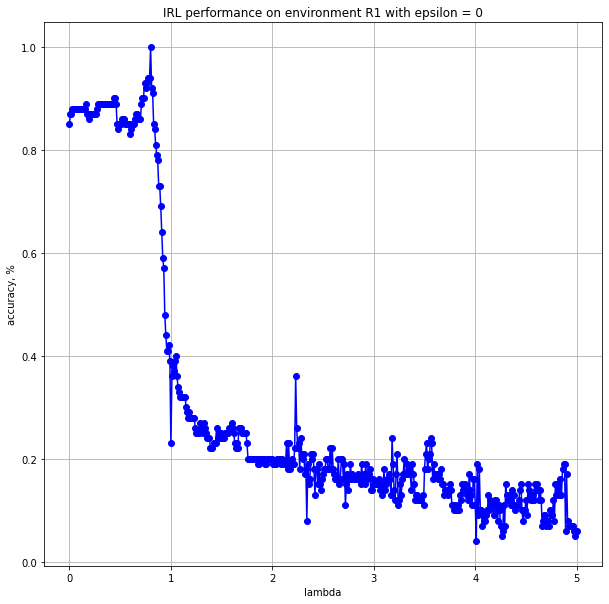

In [124]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(lambdas, accs, "-ob")
ax.grid()
ax.title.set_text("IRL performance on environment R1 with epsilon = 0")
ax.set_xlabel('lambda')
ax.set_ylabel('accuracy, %')
plt.savefig('plots/q25-pi1.png')

C:\Users\slavc\Desktop\UCLA\Courses\Spring_2021\232E\232E\venv_232E\lib\site-packages\cvxpy\problems\problem.py:1267: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


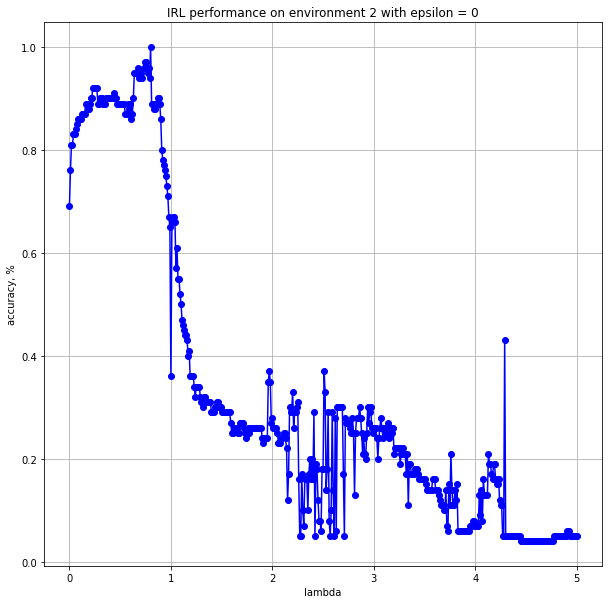

In [120]:
# declare number of lambda points to test over
NUM_POINTS = 500

# set all necessary constants for creating an environment
S = np.arange(100).reshape((10, 10)).T
A = ["top", "bottom", "left", "right"]
w = 0.1
P = transition_probabilities(w)
gamma = 0.8
eps = 0

# init the vector of accuracies
accs2 = np.zeros((NUM_POINTS+1))
# init lambdas to sweep through
lambdas = np.linspace(0, 5, num=NUM_POINTS+1)
# sweep through them
for i in range(lambdas.shape[0]):
    # compute reverse-engineered R
    irl_R2 = irl(env2, pi2, lambdas[i], np.max(np.abs(R2)))
    # create temporary RL environment
    irl_env2 = EnvironmentRL(S, A, P, irl_R2, gamma)
    # do value iteration on it
    irl_V2, _ = value_iteration(irl_env2, eps)
    # fetch optimal policy
    irl_pi2 = computation(irl_env2, irl_V2)
    # compare policies and store accuracy
    accs2[i] = compare_policies(pi2, irl_pi2)

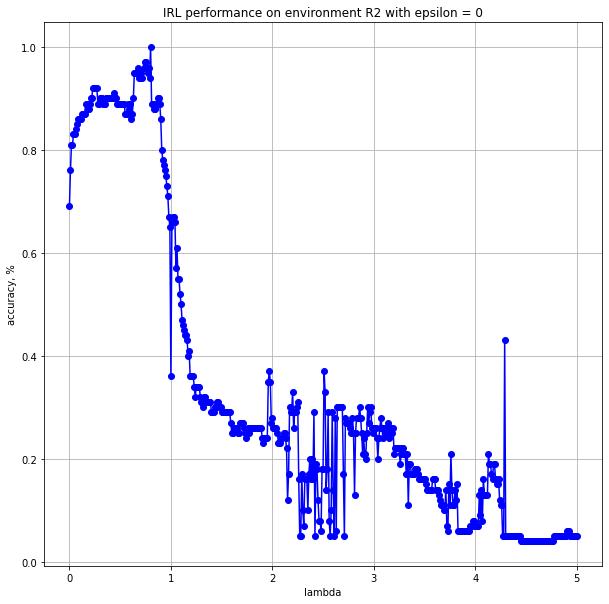

In [121]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(lambdas, accs2, "-ob")
ax.grid()
ax.title.set_text("IRL performance on environment R2 with epsilon = 0")
ax.set_xlabel('lambda')
ax.set_ylabel('accuracy, %')
plt.savefig('plots/q25-pi2.png')